## MALIGNANT COMMENTS CLASSIFICATION
### Problem Statement
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

#### Data Set Description
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 

The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   

#### The data set includes:
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
df_train = pd.read_csv(r"C:\Users\Dhruv\Data Science with Python\Flip Robo Internship\010. Malignant-Comments-Classifier\Malignant Comments Classifier Project\train.csv")
df_test = pd.read_csv(r"C:\Users\Dhruv\Data Science with Python\Flip Robo Internship\010. Malignant-Comments-Classifier\Malignant Comments Classifier Project\test.csv")

In [7]:
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
df_train.drop(columns = {'id'}, inplace = True)

In [9]:
df_train.shape

(159571, 7)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [11]:
df_train['comment_text'].value_counts()

Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [12]:
df_train['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [13]:
df_train['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [14]:
df_train['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [15]:
df_train['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [16]:
df_train['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [17]:
df_train['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

In [18]:
df_train.duplicated().sum()

0

In [19]:
df_train.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [20]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
malignant,159571.0,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
highly_malignant,159571.0,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
rude,159571.0,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,0.002996,0.054650,0.0,0.0,0.0,0.0,1.0
abuse,159571.0,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
loathe,159571.0,0.008805,0.093420,0.0,0.0,0.0,0.0,1.0


In [21]:
# Eda
df_train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


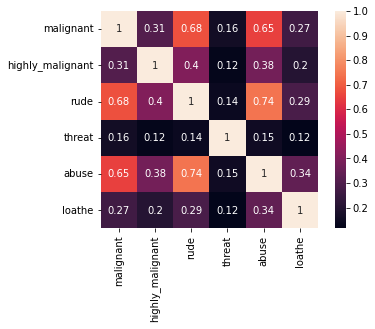

In [22]:
sns.heatmap(df_train.corr(), annot = True, square = True)
plt.show()

In [23]:
df_train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

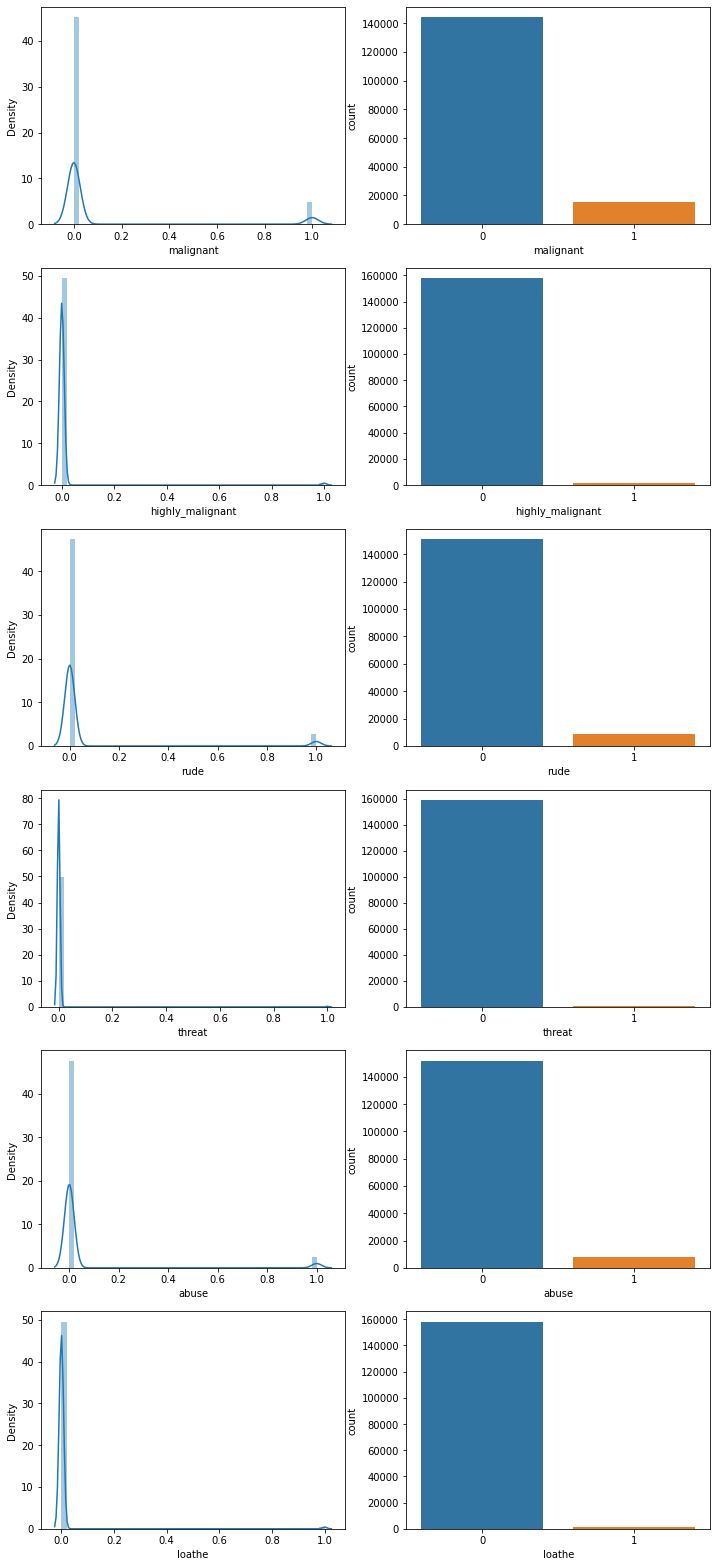

In [24]:
plt.figure(figsize=(12,28))
plt.subplot(6,2,1)
sns.distplot(df_train['malignant'])
plt.subplot(6,2,2)
sns.countplot(df_train['malignant'])
plt.subplot(6,2,3)
sns.distplot(df_train['highly_malignant'])
plt.subplot(6,2,4)
sns.countplot(df_train['highly_malignant'])
plt.subplot(6,2,5)
sns.distplot(df_train['rude'])
plt.subplot(6,2,6)
sns.countplot(df_train['rude'])
plt.subplot(6,2,7)
sns.distplot(df_train['threat'])
plt.subplot(6,2,8)
sns.countplot(df_train['threat'])
plt.subplot(6,2,9)
sns.distplot(df_train['abuse'])
plt.subplot(6,2,10)
sns.countplot(df_train['abuse'])
plt.subplot(6,2,11)
sns.distplot(df_train['loathe'])
plt.subplot(6,2,12)
sns.countplot(df_train['loathe'])
plt.show()

## Data Preprocessing

In [25]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
import string

In [26]:
df_train['length']=df_train['comment_text'].str.len()
df_train.head(2)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112


In [27]:
# convert to lower
df_train['comment_text']=df_train['comment_text'].str.lower()

In [28]:
# replace email address
df_train['comment_text']=df_train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddr')

In [29]:
# replace web address
df_train['comment_text']=df_train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [30]:
# replace money symbols
df_train['comment_text']=df_train['comment_text'].str.replace(r'£|\$', 'moneysymb')

In [31]:
# replace 10 digit phone numbers with 'phonenumber'
df_train['comment_text']=df_train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumbr')

In [32]:
# replace normal numbers with 'numbr'
df_train['comment_text']=df_train['comment_text'].str.replace(r'\d+(\.\d+)?','numbr')

In [33]:
df_train['comment_text'] =df_train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

In [34]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [37]:
lem=WordNetLemmatizer()
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(
lem.lemmatize(t) for t in x.split()))

In [38]:
df_train['clean_length'] = df_train.comment_text.str.len()
df_train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [39]:
# Total length removal
print ('Original Length', df_train.length.sum())
print ('Clean Length', df_train.clean_length.sum())

Original Length 62893130
Clean Length 43577387


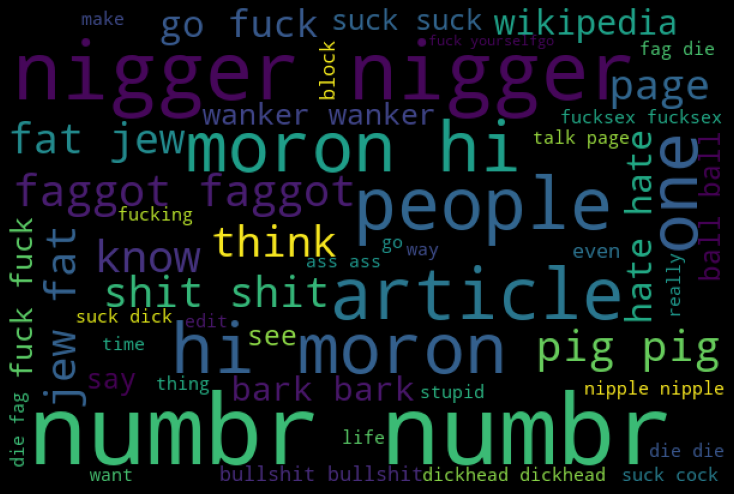

In [40]:
#Analysing of loud words which are offensive,hurting and not accpectable
from wordcloud import WordCloud
hams = df_train['comment_text'][df_train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [41]:
df_test['length'] = df_test['comment_text'].str.len()
df_test.head(2)

,id,comment_text,length
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50


In [42]:
# Convert to lower
df_test['comment_text']=df_test['comment_text'].str.lower()

#Replace email address
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace web address
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols 
df_test['comment_text'] = df_test['comment_text'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

df_test['comment_text'] =df_test['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))


df_test['clean_length'] =df_test.comment_text.str.len()
df_test.head()

,id,comment_text,length,clean_length
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,249
1,0000247867823ef7,"== rfc == title fine is, imo.",50,29
2,00013b17ad220c46,== source == zawe ashton lapland —,54,34
3,00017563c3f7919a,":if look back source, information updated corr...",205,117
4,00017695ad8997eb,anonymously edit article all.,41,29


In [43]:
print ('Origial Length:', df_test.length.sum())
print ('Clean Length:', df_test.clean_length.sum())

Origial Length: 55885733
Clean Length: 38993729


In [46]:
# importing important libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc,f1_score
from sklearn.model_selection import cross_val_score,GridSearchCV

In [47]:
target_columns = ['malignant','highly_malignant','rude','threat','abuse','loathe']
target_data =df_train[target_columns]

df_train['bad'] =df_train[target_columns].sum(axis =1)
print(df_train['bad'].value_counts())
df_train['bad'] = df_train['bad'] > 0 
df_train['bad'] = df_train['bad'].astype(int)
print(df_train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


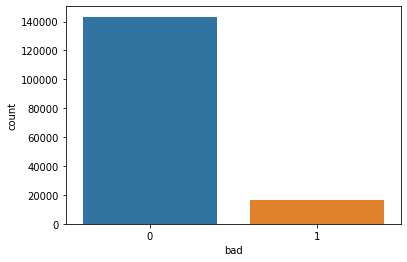

In [49]:
sns.countplot(df_train['bad'])
plt.show()

In [50]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df_train['comment_text'])
x = features

In [51]:
df_train.shape

(159571, 10)

In [52]:
df_test.shape

(153164, 4)

In [53]:
y=df_train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [54]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [55]:
# Logistic Regression
LG = LogisticRegression()
#for trainoing data
LG.fit(x_train, y_train)
y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

# for testing data
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9595967734715619
Test accuracy is 0.9553392379679144
[[42729   221]
 [ 1917  3005]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [56]:
# DecisionTree Regression
DTC = DecisionTreeClassifier()
#for trainoing data
DTC.fit(x_train, y_train)
y_pred_train = DTC.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

# for testing data
y_pred_test = DTC.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988898736783678
Test accuracy is 0.939651570855615
[[41593  1357]
 [ 1532  3390]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.71      0.69      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



In [57]:
# KNeighborsClassifier
knn = KNeighborsClassifier()
#for trainoing data
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

# for testing data
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9296591733139956
Test accuracy is 0.9181567513368984
[[42604   346]
 [ 3572  1350]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     42950
           1       0.80      0.27      0.41      4922

    accuracy                           0.92     47872
   macro avg       0.86      0.63      0.68     47872
weighted avg       0.91      0.92      0.90     47872



In [58]:
# Random Forest Regression
RF = RandomForestClassifier()
#for trainoing data
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

# for testing data
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988272052569853
Test accuracy is 0.9546916778074866
[[42400   550]
 [ 1619  3303]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.75      4922

    accuracy                           0.95     47872
   macro avg       0.91      0.83      0.86     47872
weighted avg       0.95      0.95      0.95     47872



In [60]:
# AdaBoostClassifier Regression
ada = AdaBoostClassifier()
#for trainoing data
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

# for testing data
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9463737365598618
Test accuracy is 0.9454169451871658
[[42587   363]
 [ 2250  2672]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.54      0.67      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.77      0.82     47872
weighted avg       0.94      0.95      0.94     47872



In [59]:
# xgboost Regression
xgb = XGBClassifier()
#for trainoing data
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

# for testing data
y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9614410155865316
Test accuracy is 0.9526445521390374
[[42686   264]
 [ 2003  2919]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     42950
           1       0.92      0.59      0.72      4922

    accuracy                           0.95     47872
   macro avg       0.94      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872



In [61]:
# Hypertuning the model with Random forest Classifier:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cvs=cross_val_score(RF, x, y, cv=5, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988540631518635
Test accuracy is 0.9553183489304813
cross validation score : 95.65522512911213
[[42420   530]
 [ 1609  3313]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.76      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



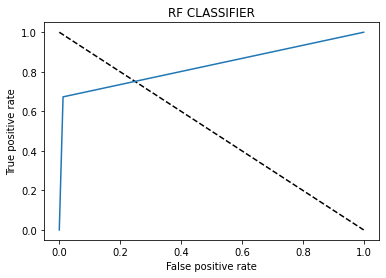

In [62]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [63]:
test_data =tf_vec.fit_transform(df_test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2848168 stored elements in Compressed Sparse Row format>

In [64]:
df_test['malignant']=RF.predict(test_data)
df_test['highly_malignant']=RF.predict(test_data)
df_test['rude']=RF.predict(test_data)
df_test['threat']=RF.predict(test_data)
df_test['abuse']=RF.predict(test_data)
df_test['loathe']=RF.predict(test_data)
df_test[['id','comment_text','malignant','highly_malignant','rude','threat','abuse','loathe']].to_csv('Malignant_comment_submission.csv', index=False)

In [65]:
submission = pd.read_csv(r'Malignant_comment_submission.csv')
submission.shape

(153164, 8)

In [66]:
import joblib
joblib.dump(RF,"MalignantComment Prediction.pkl")

['MalignantComment Prediction.pkl']

In [67]:
submission.sample(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
124981,d0c854ca11363c46,"please vandalize pages, edit tastykake. contin...",0,0,0,0,0,0
54483,5a8e28b38ed9a3c8,":as writes article page, green color mean """"vi...",0,0,0,0,0,0
148233,f7bcdb53f87dee1d,== test ==,0,0,0,0,0,0
109976,b772f5fdba830c5e,thats stupid thing i've ever heard. take score...,0,0,0,0,0,0
77404,811648bf4e4b5fe4,== vagina == eat taste good,0,0,0,0,0,0
21728,24443a4d6e551d80,block evading sock puppet dalai lama ding dong,1,1,1,1,1,1
147388,f65a735450cc8359,== sorry == mean link oasis academy: mediacity...,0,0,0,0,0,0
37977,3f03ec0668a96204,:good idea. i've sorely tempted tell dick it. —,0,0,0,0,0,0
80966,872309c71bc8f3eb,== hate wikipedia!!!! == article accent (music...,0,0,0,0,0,0
45866,4c192f735ed70026,"sockpuppet== evidence incontrovertible, there'...",0,0,0,0,0,0
